In [10]:
!pip install pandas
!pip install scipy
!pip install matplotlib
!pip install seaborn
!pip install tensorflow
import zipfile
import os
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import xml.etree.ElementTree as ET
import tensorflow as tf

In [11]:
uploaded_zip = '/home/spope/EclipsePlatform/eclipse_platform.zip'
extract_dir = '/home/spope/EclipsePlatform/extracted'
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)
with zipfile.ZipFile(uploaded_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

csv_file = os.path.join(extract_dir, 'eclipse_platform.csv')
fulldata = pd.read_csv(csv_file)
##accessing a CSV for bug data

In [12]:
# Split the data into training and test sets
train_size = int(0.8 * len(fulldata))
test_size = len(fulldata) - train_size

trainset, testset = fulldata[:train_size], fulldata[train_size:]
testset

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time
68124,229802,P3,Update (deprecated - use RT>Equinox>p2),NaN,Cant disable a feature,Build ID: 3.3.2; ; Steps To Reproduce:; Im try...,RESOLVED,WONTFIX,3.3.2,2008-05-01 11:57:00 -0400,2012-07-24 10:22:18 -0400
68125,229805,P3,UI,224096.0,build id wrong in the about dialog,In win32; help->about the build id is wrong; i...,RESOLVED,DUPLICATE,3.3,2008-05-01 12:09:00 -0400,2008-05-01 12:17:44 -0400
68126,229807,P3,UI,NaN,[JFace] ConfigureColumnsDialog does not work c...,The logic for dealing with column order is bac...,VERIFIED,FIXED,3.4,2008-05-01 12:21:00 -0400,2008-05-02 11:27:15 -0400
68127,229841,P3,SWT,NaN,Widget is disposed in ControlExample,- run the ControlExample; - press the Set/Get ...,RESOLVED,FIXED,3.4,2008-05-01 14:34:00 -0400,2008-05-15 11:02:19 -0400
68128,229847,P3,Resources,NaN,An internal error occurred during: Initializin...,I got this one restarting a self-hosting works...,RESOLVED,WORKSFORME,3.4,2008-05-01 14:52:00 -0400,2010-10-27 06:47:15 -0400
...,...,...,...,...,...,...,...,...,...,...,...
85151,424679,P3,IDE,390071.0,Crash on bootstarp,NaN,CLOSED,DUPLICATE,4.3,2013-12-26 20:12:00 -0500,2013-12-31 05:32:07 -0500
85152,424714,P3,UI,NaN,[GTK/Linux] Blank Windows with GTK3,I started testing 4.4 and noticed the editor w...,CLOSED,NDUPLICATE,4.4,2013-12-28 08:57:00 -0500,2014-01-04 13:54:33 -0500
85153,424722,P3,Website,NaN,software,NaN,RESOLVED,INVALID,4.3.1,2013-12-29 03:57:00 -0500,2014-01-07 08:47:24 -0500
85154,424764,P3,SWT,NaN,Crash (MacOS) - getIvar,Process: eclipse [42412]; Path: ...,CLOSED,NDUPLICATE,4.4,2013-12-30 16:43:00 -0500,2013-12-31 04:35:42 -0500


In [13]:
#Creating a dataset to work with without messing up the initial one from the CSV
timedata = trainset

In [14]:
##Making Created_time and Resolved_time in a format that is more uniform M/D/Y H:M
timedata['Created_time2'] = pd.to_datetime(timedata['Created_time'], utc=True)
timedata['Resolved_time2'] = pd.to_datetime(timedata['Resolved_time'], utc=True)
timedata['Created_time2'] = pd.to_datetime(timedata['Created_time2'], format='%m/%d/%Y %H:%M')
timedata['Resolved_time2'] = pd.to_datetime(timedata['Resolved_time2'], format='%m/%d/%Y %H:%M')

##Creating a column for duraation (how long it took the bug to get fixed) in hours 
timedata['Duration'] = timedata['Resolved_time2']-timedata['Created_time2']
timedata['Duration_hours'] = timedata['Duration'].dt.total_seconds() / 3600
timedata.drop(['Created_time2', 'Resolved_time2', 'Duration'], axis=1, inplace=True)

/tmp/ipykernel_59826/3249206158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timedata['Created_time2'] = pd.to_datetime(timedata['Created_time'], utc=True)
/tmp/ipykernel_59826/3249206158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timedata['Resolved_time2'] = pd.to_datetime(timedata['Resolved_time'], utc=True)
/tmp/ipykernel_59826/3249206158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time,Duration_hours
0,1,P3,Team,NaN,Usability issue with external editors (1GE6IRL),- Setup a project that contains a *.gif resour...,CLOSED,FIXED,2.0,2001-10-10 21:34:00 -0400,2012-02-09 15:57:47 -0500,90571.396389
1,2,P5,Team,NaN,Opening repository resources doesnt honor type...,Opening repository resource always open the de...,RESOLVED,FIXED,2.0,2001-10-10 21:34:00 -0400,2002-05-07 10:33:56 -0400,5004.998889
2,3,P5,Team,NaN,Sync does not indicate deletion (1GIEN83),KM (10/2/2001 5:55:18 PM); \tThis PR about the...,RESOLVED,FIXED,2.0,2001-10-10 21:34:00 -0400,2010-05-07 10:28:53 -0400,75132.914722
3,4,P5,Team,NaN,need better error message if catching up over ...,- become synchronized with some project in a r...,RESOLVED,FIXED,2.0,2001-10-10 21:34:00 -0400,2002-03-01 16:27:31 -0500,3403.891944
4,5,P3,Team,NaN,ISharingManager sharing API inconsistent (1GAU...,For getting/setting the managed state of a res...,RESOLVED,WONTFIX,2.0,2001-10-10 21:34:00 -0400,2008-08-15 08:04:36 -0400,60010.510000
...,...,...,...,...,...,...,...,...,...,...,...,...
68119,229777,P3,UI,NaN,[Viewers] Wrong argument in the first statemen...,Build ID: 3.3 (I am not sure what You mean by ...,RESOLVED,FIXED,3.3,2008-05-01 09:47:00 -0400,2008-05-10 10:06:07 -0400,216.318611
68120,229779,P3,UI,NaN,NPE in performance tests,There are several NPEs within the UI session t...,VERIFIED,FIXED,3.4,2008-05-01 09:52:00 -0400,2008-05-20 10:12:14 -0400,456.337222
68121,229782,P3,UI,NaN,Performance tests for ICU Collator,I20080501-0100; ; Now that were using the coll...,VERIFIED,FIXED,3.4,2008-05-01 10:05:00 -0400,2009-06-01 14:25:12 -0400,9508.336667
68122,229789,P3,UI,NaN,[Examples] examples plugins create duplicate m...,Created attachment 98318; screenshot; ; I20080...,VERIFIED,FIXED,3.4,2008-05-01 11:02:00 -0400,2008-05-30 21:57:57 -0400,706.932500


/tmp/ipykernel_59826/2767741725.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timedata['label'] = timedata['Duration_hours'].apply(lambda x: 'long' if x >= mean_duration_hours else 'short')


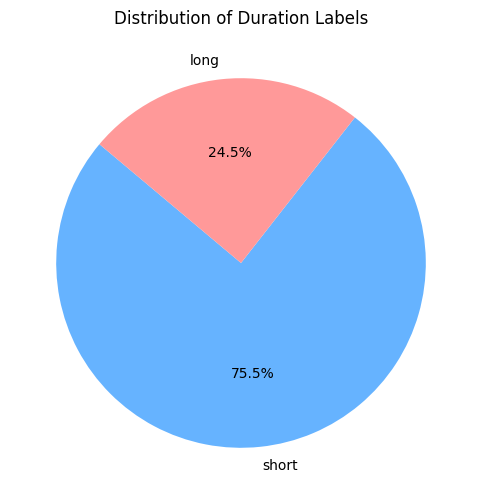

In [20]:
#Finding the mean duration to find the cutoffs for short and long time
mean_duration_hours = timedata['Duration_hours'].mean()
timedata['label'] = timedata['Duration_hours'].apply(lambda x: 'long' if x >= mean_duration_hours else 'short')

##Creating a pie chart to show percentages of bugs that took a long time to fix and percentages that took a short time to fix 
label_counts = timedata['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Duration Labels')

#creating a CSV that includes the duration
timedata.to_csv("timedata.csv", index=False)


In [16]:
##imports for preprocessing
!pip install -U scikit-learn
!pip install nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('all')

In [21]:
##accessing the CSV that includes duration and calling the df preprocessing
preprocessing = pd.read_csv('timedata.csv')

##creating a function to preprocess texts
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

# apply the preprocess_)text to the duration column of the preprocessing df
preprocessing['Description'] = preprocessing['Description'].apply(preprocess_text)


In [22]:
sentiAnalysis = preprocessing
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wn.ADJ
    elif treebank_tag.startswith('V'):
        return wn.VERB
    elif treebank_tag.startswith('N'):
        return wn.NOUN
    elif treebank_tag.startswith('R'):
        return wn.ADV
    else:
        return None

# Function to calculate sentiment scores
def calculate_sentiment_scores(description):
    tokens = word_tokenize(description)
    tagged_tokens = pos_tag(tokens)
    
    pos_score = 0
    neg_score = 0
    token_count = 0
    
    for word, tag in tagged_tokens:
        wn_tag = get_wordnet_pos(tag)
        if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
            continue
        
        synsets = list(swn.senti_synsets(word, wn_tag))
        if not synsets:
            continue
        
        # Use the first synset for simplicity
        synset = synsets[0]
        pos_score += synset.pos_score()
        neg_score += synset.neg_score()
        token_count += 1
    
    # Normalize scores by the number of tokens
    if token_count > 0:
        pos_score /= token_count
        neg_score /= token_count
    
    return pos_score, neg_score

# Apply sentiment score calculation to each description
sentiAnalysis[['Pos_Score', 'Neg_Score']] = sentiAnalysis['Description'].apply(lambda x: pd.Series(calculate_sentiment_scores(x)))

# Display the DataFrame with the new columns
sentiAnalysis

Exception ignored in: <function SeekableUnicodeStreamReader.__del__ at 0x7fa1c0ddf240>
Traceback (most recent call last):
  File "/home/spope/anaconda3/envs/reu/lib/python3.11/site-packages/nltk/data.py", line 1160, in __del__
    if not self.closed:
           ^^^^^^^^^^^
  File "/home/spope/anaconda3/envs/reu/lib/python3.11/site-packages/nltk/data.py", line 1180, in closed
    return self.stream.closed
           ^^^^^^^^^^^
AttributeError: 'SeekableUnicodeStreamReader' object has no attribute 'stream'


,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time,Duration_hours,label,Pos_Score,Neg_Score
0,1,P3,Team,NaN,Usability issue with external editors (1GE6IRL),- setup project contains * .gif resource ; - r...,CLOSED,FIXED,2.0,2001-10-10 21:34:00 -0400,2012-02-09 15:57:47 -0500,90571.396389,long,0.046703,0.061813
1,2,P5,Team,NaN,Opening repository resources doesnt honor type...,opening repository resource always open defaul...,RESOLVED,FIXED,2.0,2001-10-10 21:34:00 -0400,2002-05-07 10:33:56 -0400,5004.998889,short,0.022177,0.050403
2,3,P5,Team,NaN,Sync does not indicate deletion (1GIEN83),km ( 10/2/2001 5:55:18 pm ) ; pr deletion indi...,RESOLVED,FIXED,2.0,2001-10-10 21:34:00 -0400,2010-05-07 10:28:53 -0400,75132.914722,long,0.096354,0.039062
3,4,P5,Team,NaN,need better error message if catching up over ...,- become synchronized project repository ; - u...,RESOLVED,FIXED,2.0,2001-10-10 21:34:00 -0400,2002-03-01 16:27:31 -0500,3403.891944,short,0.059375,0.084375
4,5,P3,Team,NaN,ISharingManager sharing API inconsistent (1GAU...,getting/setting managed state resource ; metho...,RESOLVED,WONTFIX,2.0,2001-10-10 21:34:00 -0400,2008-08-15 08:04:36 -0400,60010.510000,long,0.077381,0.005952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68119,229777,P3,UI,NaN,[Viewers] Wrong argument in the first statemen...,build id : 3.3 ( sure mean build id ; 3.3 ecli...,RESOLVED,FIXED,3.3,2008-05-01 09:47:00 -0400,2008-05-10 10:06:07 -0400,216.318611,short,0.077703,0.037162
68120,229779,P3,UI,NaN,NPE in performance tests,several npes within ui session test prevent ru...,VERIFIED,FIXED,3.4,2008-05-01 09:52:00 -0400,2008-05-20 10:12:14 -0400,456.337222,short,0.041667,0.041667
68121,229782,P3,UI,NaN,Performance tests for ICU Collator,i20080501-0100 ; ; using collator ( see depend...,VERIFIED,FIXED,3.4,2008-05-01 10:05:00 -0400,2009-06-01 14:25:12 -0400,9508.336667,long,0.025000,0.000000
68122,229789,P3,UI,NaN,[Examples] examples plugins create duplicate m...,created attachment 98318 ; screenshot ; ; i200...,VERIFIED,FIXED,3.4,2008-05-01 11:02:00 -0400,2008-05-30 21:57:57 -0400,706.932500,short,0.095588,0.000000


In [23]:
sentiAnalysis.to_csv("sentiAnalysis.csv", index=False)

In [25]:
DFsentiAnalysis = pd.read_csv('sentiAnalysis.csv')
DFsentiAnalysis

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time,Duration_hours,label,Pos_Score,Neg_Score
0,1,P3,Team,NaN,Usability issue with external editors (1GE6IRL),- setup project contains * .gif resource ; - r...,CLOSED,FIXED,2.0,2001-10-10 21:34:00 -0400,2012-02-09 15:57:47 -0500,90571.396389,long,0.046703,0.061813
1,2,P5,Team,NaN,Opening repository resources doesnt honor type...,opening repository resource always open defaul...,RESOLVED,FIXED,2.0,2001-10-10 21:34:00 -0400,2002-05-07 10:33:56 -0400,5004.998889,short,0.022177,0.050403
2,3,P5,Team,NaN,Sync does not indicate deletion (1GIEN83),km ( 10/2/2001 5:55:18 pm ) ; pr deletion indi...,RESOLVED,FIXED,2.0,2001-10-10 21:34:00 -0400,2010-05-07 10:28:53 -0400,75132.914722,long,0.096354,0.039062
3,4,P5,Team,NaN,need better error message if catching up over ...,- become synchronized project repository ; - u...,RESOLVED,FIXED,2.0,2001-10-10 21:34:00 -0400,2002-03-01 16:27:31 -0500,3403.891944,short,0.059375,0.084375
4,5,P3,Team,NaN,ISharingManager sharing API inconsistent (1GAU...,getting/setting managed state resource ; metho...,RESOLVED,WONTFIX,2.0,2001-10-10 21:34:00 -0400,2008-08-15 08:04:36 -0400,60010.510000,long,0.077381,0.005952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68119,229777,P3,UI,NaN,[Viewers] Wrong argument in the first statemen...,build id : 3.3 ( sure mean build id ; 3.3 ecli...,RESOLVED,FIXED,3.3,2008-05-01 09:47:00 -0400,2008-05-10 10:06:07 -0400,216.318611,short,0.077703,0.037162
68120,229779,P3,UI,NaN,NPE in performance tests,several npes within ui session test prevent ru...,VERIFIED,FIXED,3.4,2008-05-01 09:52:00 -0400,2008-05-20 10:12:14 -0400,456.337222,short,0.041667,0.041667
68121,229782,P3,UI,NaN,Performance tests for ICU Collator,i20080501-0100 ; ; using collator ( see depend...,VERIFIED,FIXED,3.4,2008-05-01 10:05:00 -0400,2009-06-01 14:25:12 -0400,9508.336667,long,0.025000,0.000000
68122,229789,P3,UI,NaN,[Examples] examples plugins create duplicate m...,created attachment 98318 ; screenshot ; ; i200...,VERIFIED,FIXED,3.4,2008-05-01 11:02:00 -0400,2008-05-30 21:57:57 -0400,706.932500,short,0.095588,0.000000


In [27]:
DFsentiAnalysis['emotion'] = DFsentiAnalysis['Pos_Score'] - DFsentiAnalysis['Neg_Score']

# Assign labels based on the difference
DFsentiAnalysis['emotion'] = DFsentiAnalysis['emotion'].apply(lambda x: 'positive' if x > 0 else 'negative')
DFsentiAnalysis

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time,Duration_hours,label,Pos_Score,Neg_Score,emotion
0,1,P3,Team,NaN,Usability issue with external editors (1GE6IRL),- setup project contains * .gif resource ; - r...,CLOSED,FIXED,2.0,2001-10-10 21:34:00 -0400,2012-02-09 15:57:47 -0500,90571.396389,long,0.046703,0.061813,negative
1,2,P5,Team,NaN,Opening repository resources doesnt honor type...,opening repository resource always open defaul...,RESOLVED,FIXED,2.0,2001-10-10 21:34:00 -0400,2002-05-07 10:33:56 -0400,5004.998889,short,0.022177,0.050403,negative
2,3,P5,Team,NaN,Sync does not indicate deletion (1GIEN83),km ( 10/2/2001 5:55:18 pm ) ; pr deletion indi...,RESOLVED,FIXED,2.0,2001-10-10 21:34:00 -0400,2010-05-07 10:28:53 -0400,75132.914722,long,0.096354,0.039062,positive
3,4,P5,Team,NaN,need better error message if catching up over ...,- become synchronized project repository ; - u...,RESOLVED,FIXED,2.0,2001-10-10 21:34:00 -0400,2002-03-01 16:27:31 -0500,3403.891944,short,0.059375,0.084375,negative
4,5,P3,Team,NaN,ISharingManager sharing API inconsistent (1GAU...,getting/setting managed state resource ; metho...,RESOLVED,WONTFIX,2.0,2001-10-10 21:34:00 -0400,2008-08-15 08:04:36 -0400,60010.510000,long,0.077381,0.005952,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68119,229777,P3,UI,NaN,[Viewers] Wrong argument in the first statemen...,build id : 3.3 ( sure mean build id ; 3.3 ecli...,RESOLVED,FIXED,3.3,2008-05-01 09:47:00 -0400,2008-05-10 10:06:07 -0400,216.318611,short,0.077703,0.037162,positive
68120,229779,P3,UI,NaN,NPE in performance tests,several npes within ui session test prevent ru...,VERIFIED,FIXED,3.4,2008-05-01 09:52:00 -0400,2008-05-20 10:12:14 -0400,456.337222,short,0.041667,0.041667,negative
68121,229782,P3,UI,NaN,Performance tests for ICU Collator,i20080501-0100 ; ; using collator ( see depend...,VERIFIED,FIXED,3.4,2008-05-01 10:05:00 -0400,2009-06-01 14:25:12 -0400,9508.336667,long,0.025000,0.000000,positive
68122,229789,P3,UI,NaN,[Examples] examples plugins create duplicate m...,created attachment 98318 ; screenshot ; ; i200...,VERIFIED,FIXED,3.4,2008-05-01 11:02:00 -0400,2008-05-30 21:57:57 -0400,706.932500,short,0.095588,0.000000,positive
